<a href="https://colab.research.google.com/github/ujin-kkk/event/blob/main/event/comico_event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.cluster import KMeans


user_purchase = pd.read_excel('/content/sample_data/comico_event.xlsx', sheet_name = 'user_purchase')
user_visit = pd.read_excel('/content/sample_data/comico_event.xlsx', sheet_name = 'user_visit')


**Purchase**

In [4]:
user_purchase.head()

,user_id,item_id,price,timestamp
0,u00934,item03,100.0,2020-09-30 19:11:22
1,u00934,item04,100.0,2020-09-30 19:11:22
2,u00934,item05,100.0,2020-09-30 19:11:22
3,u01865,item02,100.0,2020-09-30 20:14:21
4,u01865,item04,100.0,2020-09-30 20:14:21


In [5]:
user_purchase.describe()

,price
count,943.000000
mean,105.832450
std,23.448039
min,100.000000
25%,100.000000
50%,100.000000
75%,100.000000
max,200.000000


In [6]:
# delete row with missing values
user_purchase.isnull().sum()

user_id       0
item_id      10
price        10
timestamp    10
dtype: int64

In [7]:
user_purchase= user_purchase.dropna()

In [8]:
user_purchase.isnull().sum()

user_id      0
item_id      0
price        0
timestamp    0
dtype: int64

In [9]:
# 아이템명 바꾸기
user_purchase['item_id'] = user_purchase['item_id']. replace (['item01'],'01')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item02'],'02')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item03'],'03')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item04'],'04')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item05'],'05')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item06'],'06')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item07'],'07')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item08'],'08')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item09'],'09')
user_purchase['item_id'] = user_purchase['item_id']. replace (['item10'],'10')

user_purchase.head()

,user_id,item_id,price,timestamp
0,u00934,03,100.0,2020-09-30 19:11:22
1,u00934,04,100.0,2020-09-30 19:11:22
2,u00934,05,100.0,2020-09-30 19:11:22
3,u01865,02,100.0,2020-09-30 20:14:21
4,u01865,04,100.0,2020-09-30 20:14:21


In [10]:
item_counts = user_purchase['item_id'].value_counts()
item_counts

03    193
05    180
01    179
02    178
04    158
06     15
10     12
08     10
09     10
07      8
Name: item_id, dtype: int64

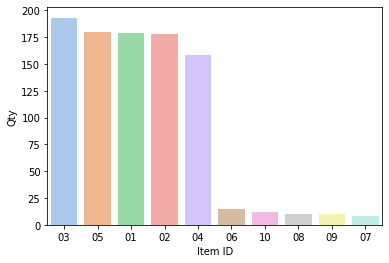

In [11]:
item_counts = user_purchase['item_id'].value_counts()
sns.set_palette("pastel")
sns.barplot(x=item_counts.index, y=item_counts)
plt.xlabel('Item ID', fontsize=10)
plt.ylabel('Qty', fontsize=10)
plt.show()

In [12]:
# multi-purchase
multi_purchase = user_purchase['user_id'].value_counts() >1
multi_purchase.value_counts()

True     318
False    148
Name: user_id, dtype: int64

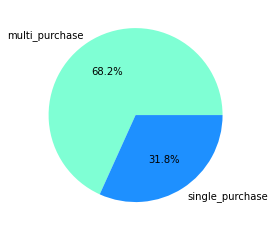

In [13]:
ratio = [318, 148]
labels = ['multi_purchase', 'single_purchase']
colors = ['aquamarine', 'dodgerblue']

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.show()

**Visit**

In [14]:
user_visit.head()

,user_id,referrer,timestamp
0,u01319,search,2020-09-30 18:38:10
1,u00241,app,2020-09-30 18:52:22
2,u00633,app,2020-09-30 18:58:11
3,u00088,app,2020-09-30 18:58:17
4,u00934,search,2020-09-30 19:02:23


In [15]:
# delete row with missing values
user_visit.isnull().sum()

user_id      0
referrer     0
timestamp    0
dtype: int64

No handles with labels found to put in legend.


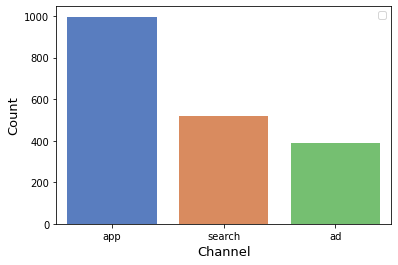

In [16]:
referrer = user_visit['referrer'].value_counts()
sns.set_palette("muted")
sns.barplot(x=referrer.index, y=referrer)
plt.xlabel('Channel', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend()
plt.show()

In [17]:
# 방문자수
user_visit['user_id'].count()

1906

In [18]:
# 구입자수
user_purchase.drop_duplicates("user_id", keep="first").count()

user_id      466
item_id      466
price        466
timestamp    466
dtype: int64

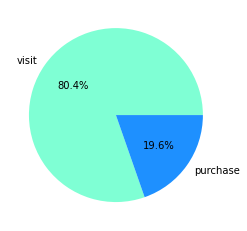

In [36]:
ratio = [1906, 466]
labels = ['visit', 'purchase']
colors = ['aquamarine', 'dodgerblue']

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.show()

In [20]:
# 구입자들의 유입경로

purchased_user = user_purchase.drop_duplicates("user_id", keep="first").user_id.values
purchased_user


array(['u00934', 'u01865', 'u00615', 'u00824', 'u00654', 'u01101',
       'u00801', 'u01662', 'u00625', 'u01624', 'u01880', 'u00011',
       'u01960', 'u01451', 'u00255', 'u01458', 'u01253', 'u00070',
       'u00275', 'u01331', 'u00387', 'u00559', 'u01096', 'u01768',
       'u01248', 'u00761', 'u01180', 'u00664', 'u00368', 'u00938',
       'u01818', 'u01258', 'u01031', 'u01851', 'u01685', 'u00491',
       'u01099', 'u00141', 'u01282', 'u00537', 'u01316', 'u01054',
       'u01450', 'u01227', 'u01825', 'u00059', 'u01203', 'u00001',
       'u01375', 'u00065', 'u01576', 'u01723', 'u01512', 'u01696',
       'u01573', 'u00946', 'u00247', 'u01314', 'u01157', 'u00209',
       'u00347', 'u01508', 'u01680', 'u01588', 'u00616', 'u01570',
       'u00878', 'u01480', 'u01975', 'u00446', 'u01184', 'u01194',
       'u01616', 'u00223', 'u00668', 'u00416', 'u00155', 'u01257',
       'u00071', 'u01962', 'u01446', 'u01718', 'u01071', 'u00670',
       'u01453', 'u00774', 'u01002', 'u00119', 'u01489', 'u011

In [21]:
purchased_user = user_visit['user_id'].isin(purchased_user)
purchased_user

0       False
1       False
2       False
3       False
4        True
        ...  
1901     True
1902    False
1903    False
1904    False
1905    False
Name: user_id, Length: 1906, dtype: bool

In [22]:
user_visit['purchased'] = purchased_user.values
user_visit.head(15)

,user_id,referrer,timestamp,purchased
0,u01319,search,2020-09-30 18:38:10,False
1,u00241,app,2020-09-30 18:52:22,False
2,u00633,app,2020-09-30 18:58:11,False
3,u00088,app,2020-09-30 18:58:17,False
4,u00934,search,2020-09-30 19:02:23,True
5,u00652,search,2020-09-30 19:20:52,False
6,u01746,ad,2020-09-30 19:25:10,False
7,u00465,app,2020-09-30 19:25:33,False
8,u01113,app,2020-09-30 19:33:28,False
9,u01994,search,2020-09-30 19:35:16,False


In [23]:
purchased_user_list = user_visit[user_visit['purchased'] == True]
purchased_user_list

,user_id,referrer,timestamp,purchased
4,u00934,search,2020-09-30 19:02:23,True
17,u01865,app,2020-09-30 20:00:02,True
28,u00615,ad,2020-09-30 20:32:10,True
31,u00824,app,2020-09-30 20:35:10,True
42,u00654,app,2020-09-30 21:05:19,True
...,...,...,...,...
1883,u00930,app,2020-10-01 22:14:03,True
1887,u01499,ad,2020-10-01 22:21:46,True
1893,u01644,app,2020-10-01 22:30:05,True
1900,u00646,app,2020-10-01 23:11:55,True


In [24]:
referrer = purchased_user_list['referrer'].value_counts()
referrer

app       254
search    178
ad         34
Name: referrer, dtype: int64

In [25]:
user_visit['referrer'].value_counts()

app       997
search    521
ad        388
Name: referrer, dtype: int64

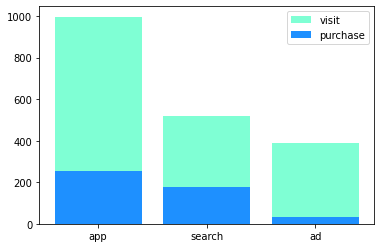

In [26]:
x = ['app', 'search', 'ad']
visit = [997, 521, 388]
purchase = [254, 178, 34]
plt.bar(x, visit, color='aquamarine', label='visit')
plt.bar(x, purchase, color='dodgerblue', label='purchase')
plt.legend()
plt.show()

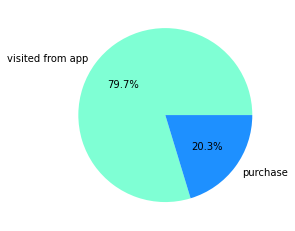

In [27]:
ratio = [997, 254]
labels = ['visited from app', 'purchase']
colors = ['aquamarine', 'dodgerblue']

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.show()

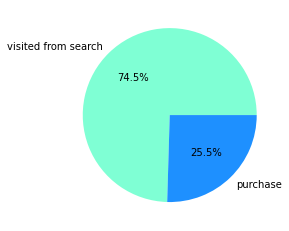

In [28]:
ratio = [521, 178]
labels = ['visited from search', 'purchase']
colors = ['aquamarine', 'dodgerblue']

plt.pie(ratio, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()

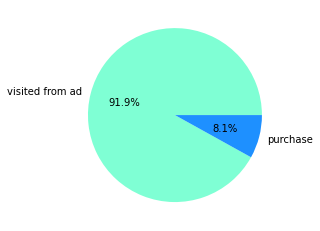

In [29]:
ratio = [388, 34]
labels = ['visited from ad', 'purchase']
colors = ['aquamarine', 'dodgerblue']

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.show()